In [1]:
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
from importlib import reload

from cv_paper_plots import hierarchy, articulator_features
from cv_paper_plots.style import letter_fontstyle, ticklabel_fontsize

In [2]:
reload(hierarchy)
folder = os.path.join(os.environ['HOME'], 'plots/model/data')
single_file = ['ec2_ec2_hg_a_model_output.pkl']
files = ['ec2_ec2_hg_a_corr_y_hat.npz',
         'ec9_ec9_hg_a_corr_y_hat.npz',
         'gp31_gp31_hg_a_corr_y_hat.npz',
         'gp33_gp33_hg_a_corr_y_hat.npz']

yhs, cv_accuracy, cvs = hierarchy.load_predictions(folder, single_file)
dp, dm, dv, dmjar = hierarchy.load_correlations(folder, files)

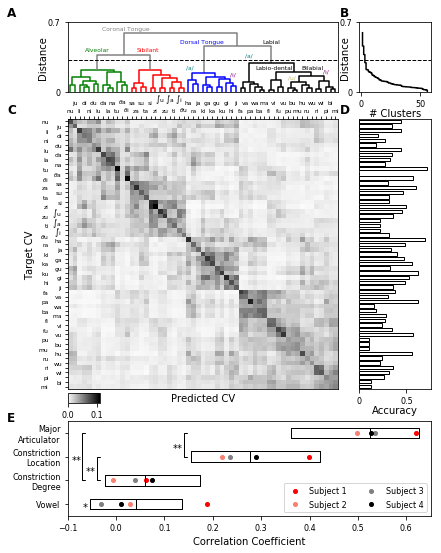

In [27]:
plt.close()
reload(hierarchy)

top_edge = .03
bot_edge = .055
l_edge = .15
r_edge = .01

h_gap = .05
v0_gap = .05
v1_gap = .06

width_cm = .625
bot_height = .175
bot_width = 1. - l_edge - r_edge

threshold = .32
max_d = .7

figsize = (6, 7.5)
f = plt.figure(figsize=figsize)

height_cm = width_cm * figsize[0] / figsize[1]

# Dendrogram axis
height_d = 1 - bot_edge - bot_height - v0_gap - height_cm - v1_gap - top_edge
r0_y = bot_edge + bot_height + v0_gap + height_cm + v1_gap
x0 = l_edge
ax0 = f.add_axes([x0, r0_y, width_cm, height_d])

width = 1 - l_edge - width_cm - h_gap - r_edge
# Distance plot
x1 = x0 + width_cm + h_gap
ax1 = f.add_axes([x1,  r0_y, width, height_d])

r1_y = bot_edge + bot_height + v1_gap
# Colorbar
x2 = x1 + width + h_gap
cax = f.add_axes([l_edge, r1_y - .45 * v1_gap, .075, .02])
# Confusion matrix
ax2 = f.add_axes([l_edge, r1_y, width_cm, height_cm])
# CV accuracies
width = 1 - l_edge - width_cm - h_gap - r_edge
ax3 = f.add_axes([l_edge + width_cm + h_gap, r1_y, width, height_cm])

# Correlations
ax4 = f.add_axes([l_edge, bot_edge, bot_width, bot_height])

z, r = hierarchy.plot_dendrogram(yhs, threshold, cvs, max_d, ax0)
hierarchy.plot_distance_vs_clusters(z, threshold, max_d, ax1)
hierarchy.plot_soft_confusion(yhs, r, f, ax2, cax)
hierarchy.plot_cv_accuracy(cv_accuracy, ax3)
hierarchy.plot_correlations(dp, dm, dv, dmjar, ax4)

x0 = .01
y0 = .98
x1 = .78
y1 = .8
y2 = .23

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)
f.text(x0, y1, 'C', **letter_fontstyle)
f.text(x1, y1, 'D', **letter_fontstyle)
f.text(x0, y2, 'E', **letter_fontstyle)

f.text(.23, .955, 'Coronal Tongue', fontsize=ticklabel_fontsize-2, color='gray')
f.text(.19, .915, 'Alveolar', fontsize=ticklabel_fontsize-2, color='green')
f.text(.31, .915, 'Sibilant', fontsize=ticklabel_fontsize-2, color='red')

f.text(.41, .93, 'Dorsal Tongue', fontsize=ticklabel_fontsize-2, color='blue')
f.text(.425, .8825, '/a/', fontsize=ticklabel_fontsize-2, color='teal')
f.text(.525, .87, '/i/', fontsize=ticklabel_fontsize-2, color='purple')

f.text(.6, .93, 'Labial', fontsize=ticklabel_fontsize-2)
f.text(.585, .8825, 'Labio-dental', fontsize=ticklabel_fontsize-2)
f.text(.69, .8825, 'Bilabial', fontsize=ticklabel_fontsize-2)
f.text(.56, .905, '/a/', fontsize=ticklabel_fontsize-2, color='teal')
f.text(.66, .865, '/u/', fontsize=ticklabel_fontsize-2, color='darkkhaki')
f.text(.74, .875, '/i/', fontsize=ticklabel_fontsize-2, color='purple')

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/hierarchy.pdf'))
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/hierarchy.png'), dpi=300)

plt.show()

# Feature Plots

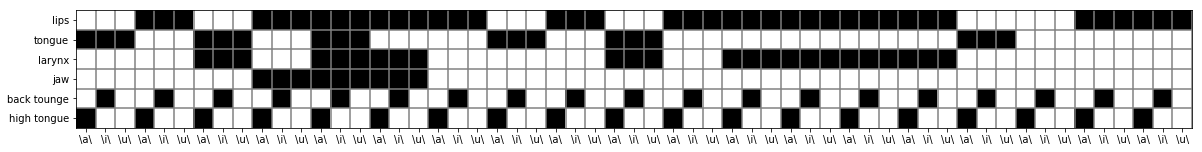

In [27]:
reload(articulator_features)
f, ax = plt.subplots(1, figsize=(20, 10))
_ = articulator_features.get_articulator_state_matrix(ax)
plt.show()